In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

netflix_df = pd.read_csv('/content/netflix_titles.csv')

netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
# genel bilgiler
print("Veri Seti Şekli:", netflix_df.shape)
print("\nSütun İsimleri:")
print(netflix_df.columns.tolist())
print("\nTemel Bilgiler:")
netflix_df.info()

Veri Seti Şekli: (8807, 12)

Sütun İsimleri:
['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']

Temel Bilgiler:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
print("Eksik Veriler:")
netflix_df.isnull().sum()

Eksik Veriler:


,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [6]:
#istatistikler
netflix_df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s8807,Movie,Zubaan,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


In [7]:
#Tarih sütunu formatı
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'], errors='coerce')

netflix_df['country'] = netflix_df['country'].fillna('Unknown')
netflix_df['rating'] = netflix_df['rating'].fillna('Unknown')

# Analiz için yeni sütunlar
netflix_df['year_added'] = netflix_df['date_added'].dt.year
netflix_df['month_added'] = netflix_df['date_added'].dt.month
"""sadece yıl / sadece ay bilgileri ile zaman bazlı analizlerde kullanmak için.
soracağım sorular olarak ; örneğin
“Netflixe en çok içerik hangi yıl eklendi?”
“Hangi ayda daha fazla yeni film geliyor?” gibi..."""

netflix_df['type'] = netflix_df['type'].astype('category')
#bellekten tasarruf ve daha hızlı

print("Temizlik sonrası veri durumu:")
print(netflix_df.isnull().sum())

Temizlik sonrası veri durumu:
show_id            0
type               0
title              0
director        2634
cast             825
country            0
date_added        98
release_year       0
rating             0
duration           3
listed_in          0
description        0
year_added        98
month_added       98
dtype: int64


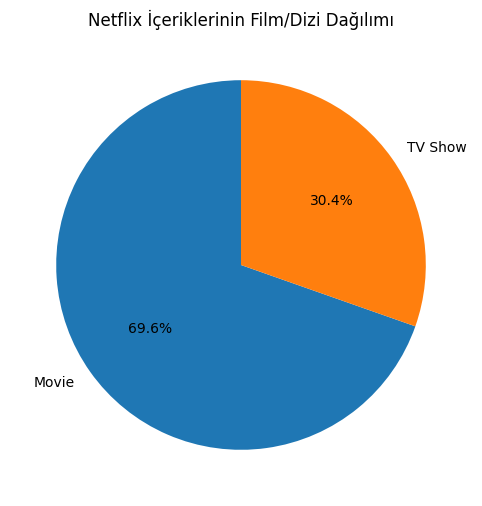

In [8]:
# Film ve Dizi Dağılımı
plt.figure(figsize=(10, 6))
type_counts = netflix_df['type'].value_counts()
plt.pie(type_counts.values, labels=type_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Netflix İçeriklerinin Film/Dizi Dağılımı')
plt.show()

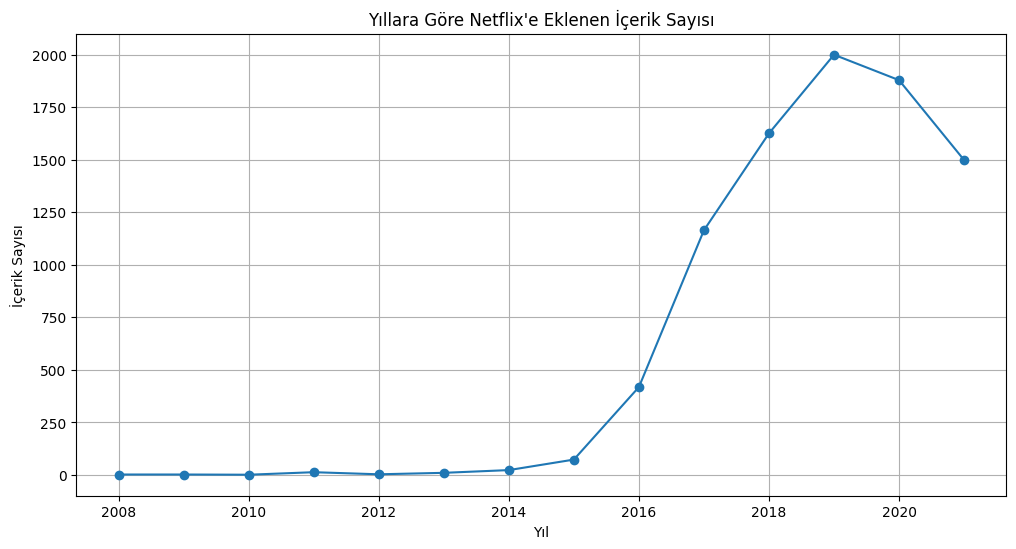

In [9]:
# Yıllara Göre İçerik Eklenme Trendi
plt.figure(figsize=(12, 6))
yearly_content = netflix_df['year_added'].value_counts().sort_index()
yearly_content.plot(kind='line', marker='o')
plt.title('Yıllara Göre Netflix\'e Eklenen İçerik Sayısı')
plt.xlabel('Yıl')
plt.ylabel('İçerik Sayısı')
plt.grid(True)
plt.show()

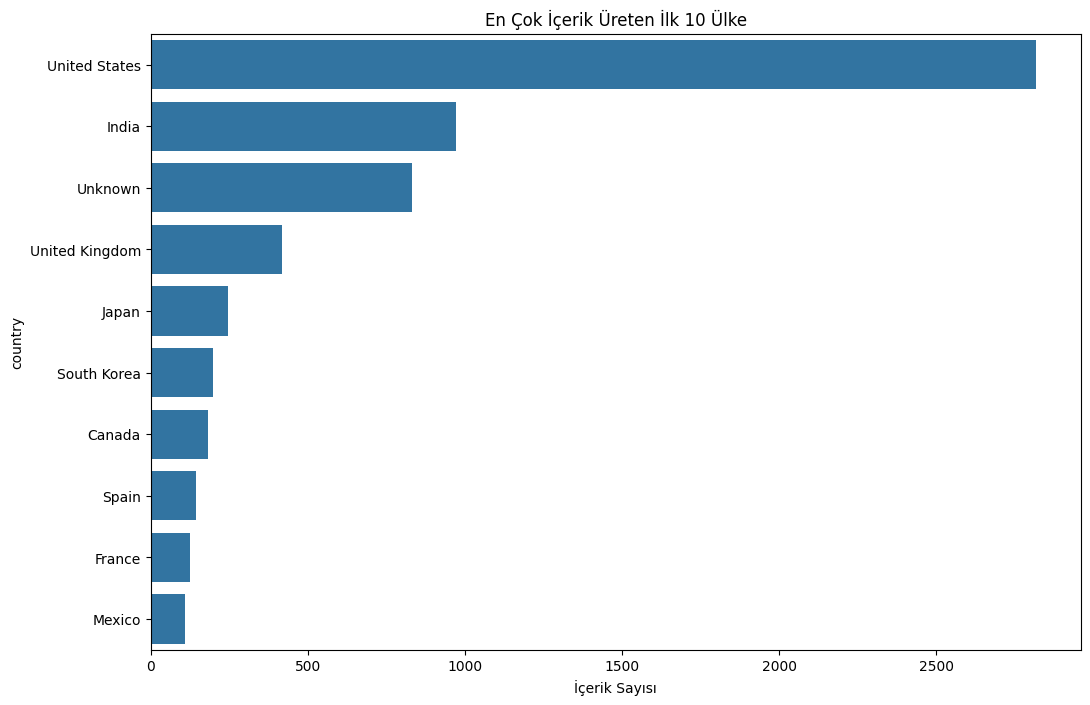

In [10]:
# En Çok İçerik Üreten 10 Ülke
plt.figure(figsize=(12, 8))
top_countries = netflix_df['country'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title('En Çok İçerik Üreten İlk 10 Ülke')
plt.xlabel('İçerik Sayısı')
plt.show()

/tmp/ipython-input-67432116.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=netflix_df, y='rating', order=rating_order, palette='coolwarm')


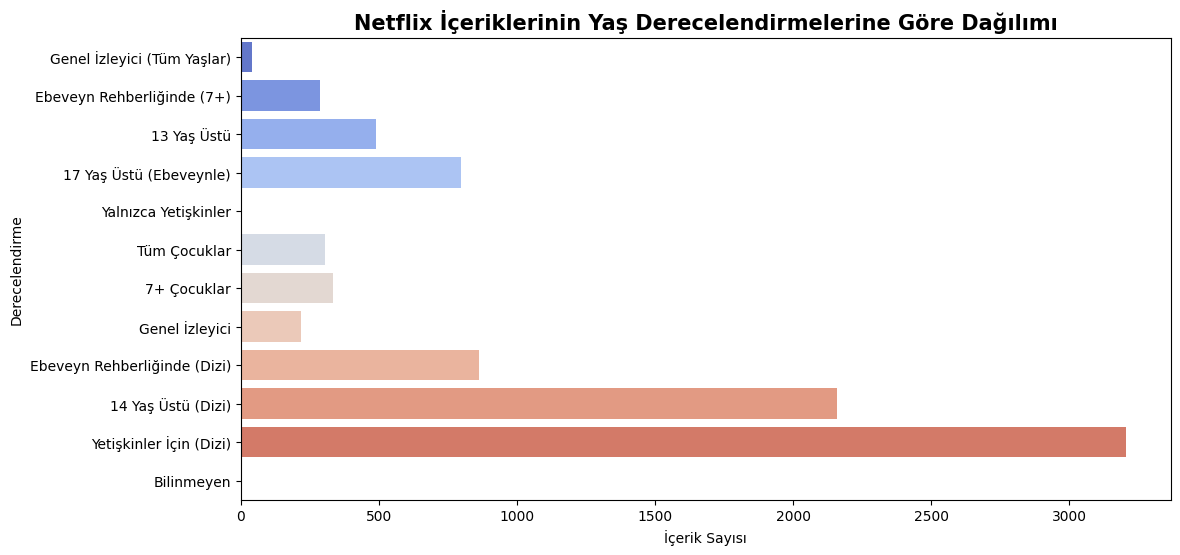

In [11]:
# Rating (Yaş Derecelendirmesi) Dağılımı
rating_labels = {
    'G': 'Genel İzleyici (Tüm Yaşlar)',
    'PG': 'Ebeveyn Rehberliğinde (7+)',
    'PG-13': '13 Yaş Üstü',
    'R': '17 Yaş Üstü (Ebeveynle)',
    'NC-17': 'Yalnızca Yetişkinler',
    'TV-Y': 'Tüm Çocuklar',
    'TV-Y7': '7+ Çocuklar',
    'TV-G': 'Genel İzleyici',
    'TV-PG': 'Ebeveyn Rehberliğinde (Dizi)',
    'TV-14': '14 Yaş Üstü (Dizi)',
    'TV-MA': 'Yetişkinler İçin (Dizi)',
    'Unknown': 'Bilinmeyen'
}

plt.figure(figsize=(12, 6))
rating_order = list(rating_labels.keys())
sns.countplot(data=netflix_df, y='rating', order=rating_order, palette='coolwarm')
plt.yticks(ticks=range(len(rating_labels)), labels=rating_labels.values())

plt.title('Netflix İçeriklerinin Yaş Derecelendirmelerine Göre Dağılımı', fontsize=15, fontweight='bold')
plt.xlabel('İçerik Sayısı')
plt.ylabel('Derecelendirme')
plt.show()


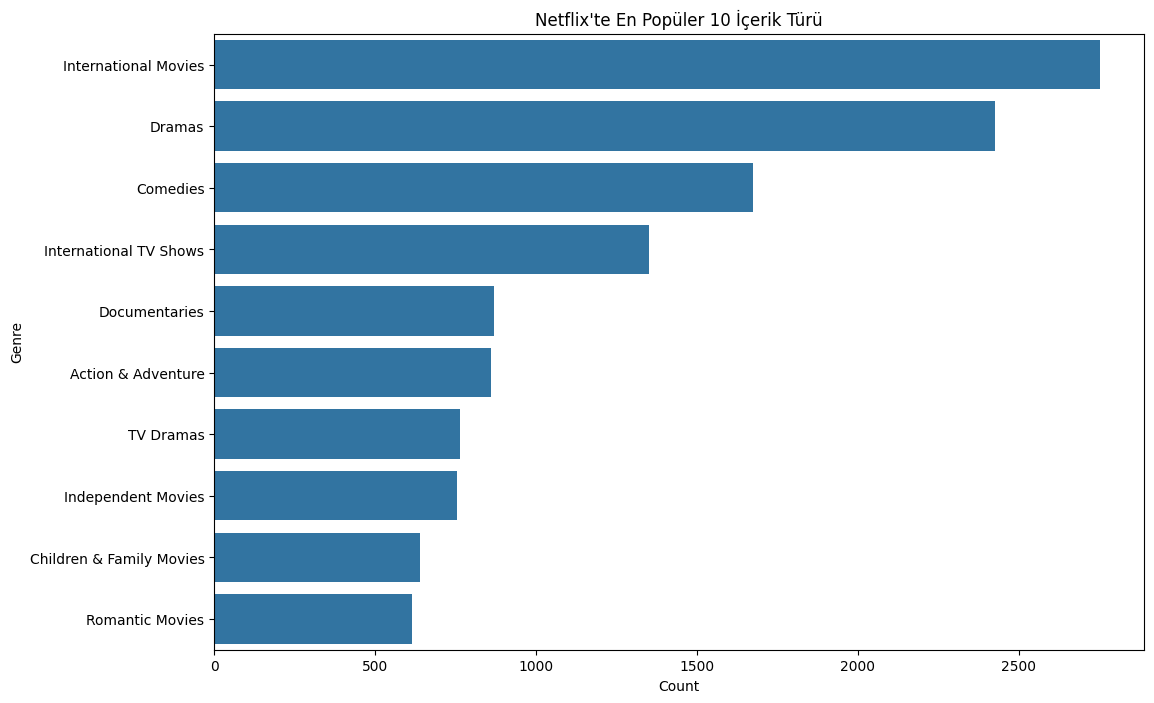

In [12]:
# Tür Analizi (Listed_in sütunundaki türleri ayırma)
from collections import Counter

# Tüm türleri birleştir ve sayma işlemi uygulaması
all_genres = ', '.join(netflix_df['listed_in'].dropna()).split(', ')
genre_counts = Counter(all_genres)

# En çok geçen 10 türiçin:
top_genres = pd.DataFrame(genre_counts.most_common(10), columns=['Genre', 'Count'])

plt.figure(figsize=(12, 8))
sns.barplot(data=top_genres, x='Count', y='Genre')
plt.title('Netflix\'te En Popüler 10 İçerik Türü')
plt.show()

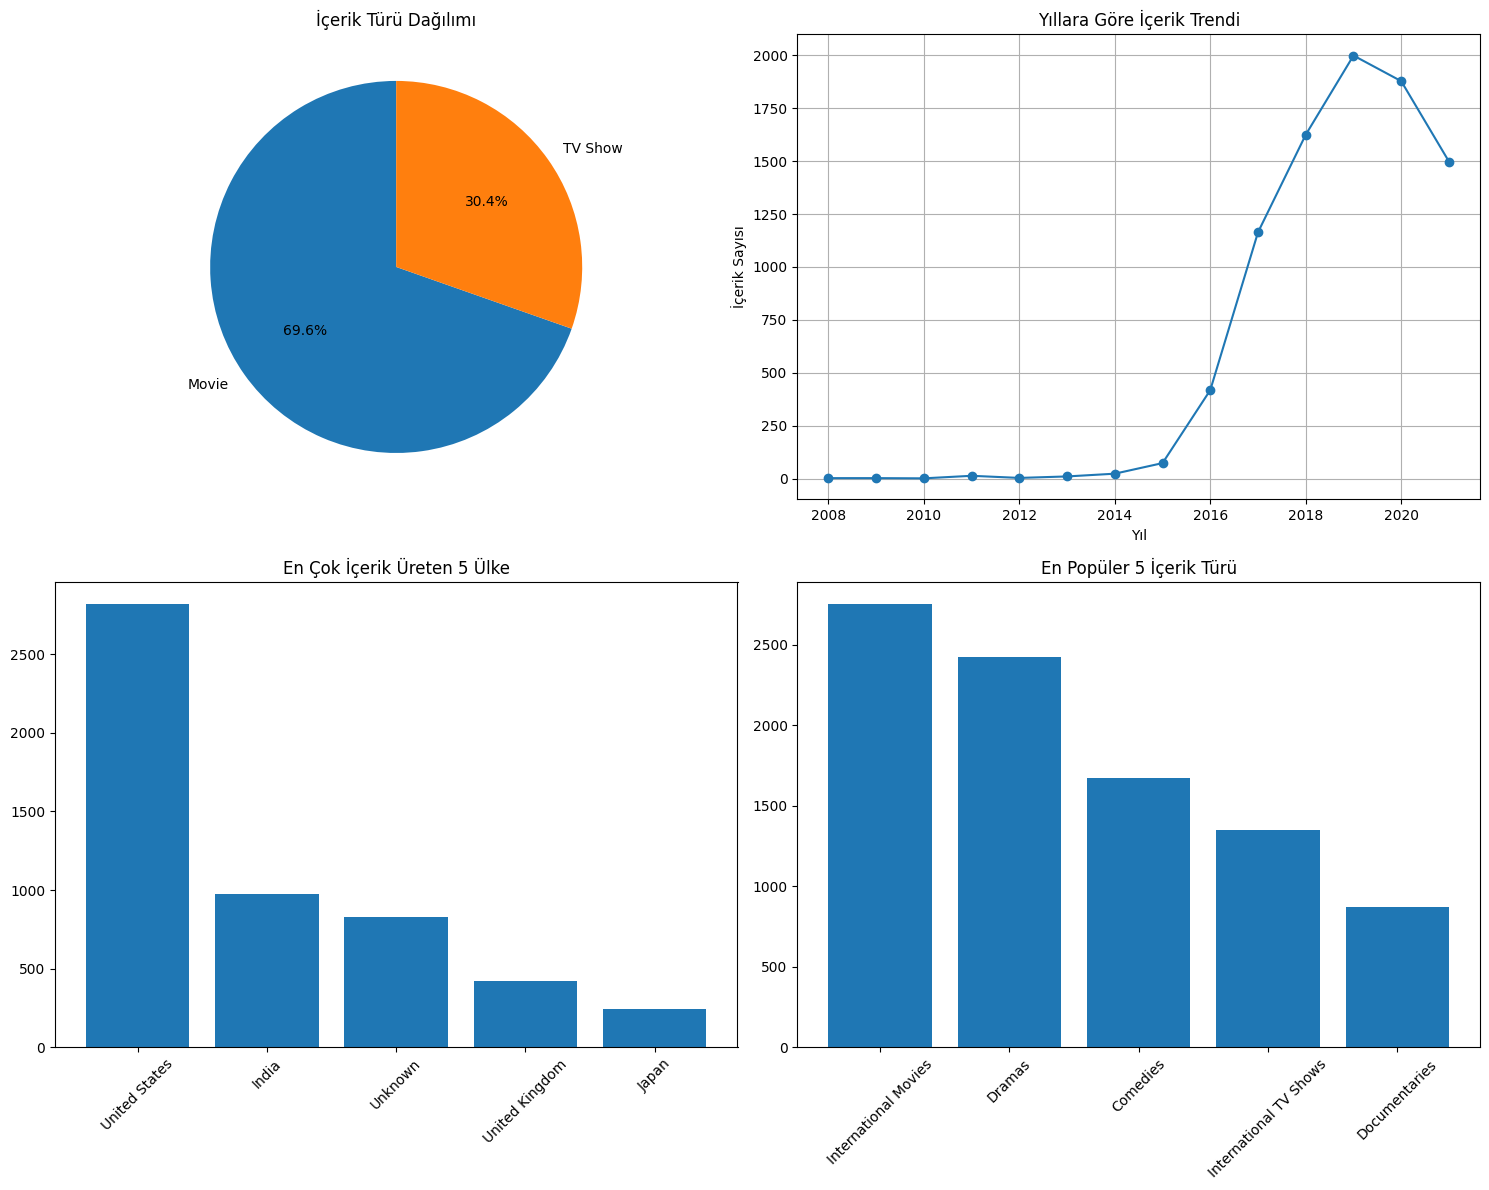

In [13]:
# Dashboard
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

type_counts = netflix_df['type'].value_counts()
axes[0,0].pie(type_counts.values, labels=type_counts.index, autopct='%1.1f%%', startangle=90)
axes[0,0].set_title('İçerik Türü Dağılımı')

yearly_content = netflix_df['year_added'].value_counts().sort_index()
axes[0,1].plot(yearly_content.index, yearly_content.values, marker='o')
axes[0,1].set_title('Yıllara Göre İçerik Trendi')
axes[0,1].set_xlabel('Yıl')
axes[0,1].set_ylabel('İçerik Sayısı')
axes[0,1].grid(True)

top_5_countries = netflix_df['country'].value_counts().head(5)
axes[1,0].bar(top_5_countries.index, top_5_countries.values)
axes[1,0].set_title('En Çok İçerik Üreten 5 Ülke')
axes[1,0].tick_params(axis='x', rotation=45)

top_5_genres = pd.DataFrame(genre_counts.most_common(5), columns=['Genre', 'Count'])
axes[1,1].bar(top_5_genres['Genre'], top_5_genres['Count'])
axes[1,1].set_title('En Popüler 5 İçerik Türü')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('netflix_dashboard.png', dpi=300, bbox_inches='tight')
plt.show()

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Açıklamalardaki anahtar kelimeler
description_text = netflix_df['description'].dropna()

# Basit kelime frekans analizi
vectorizer = CountVectorizer(stop_words='english', max_features=20)
word_matrix = vectorizer.fit_transform(description_text)
word_freq = pd.DataFrame(word_matrix.toarray(), columns=vectorizer.get_feature_names_out())
common_words = word_freq.sum().sort_values(ascending=False)

print("Açıklamalarda en sık geçen kelimeler:")
print(common_words.head(10))

Açıklamalarda en sık geçen kelimeler:
life       845
young      729
new        709
family     635
world      570
man        538
love       504
woman      486
friends    445
series     396
dtype: int64


<>:7: SyntaxWarning: invalid escape sequence '\d'
<>:7: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-2223332952.py:7: SyntaxWarning: invalid escape sequence '\d'
  movies_df['duration_numeric'] = movies_df['duration'].str.extract('(\d+)').astype(float)


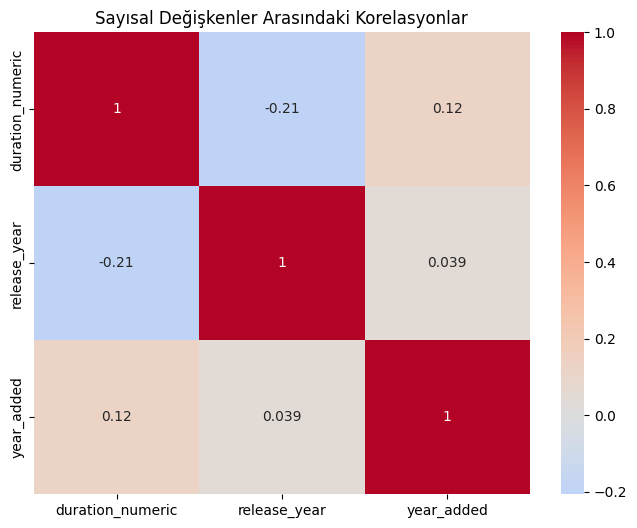

In [15]:
from scipy.stats import chi2_contingency

# Film süresi ile tür arasındaki ilişki
movies_df = netflix_df[netflix_df['type'] == 'Movie'].copy()

# Süreyi sayısal formata çevirme
movies_df['duration_numeric'] = movies_df['duration'].str.extract('(\d+)').astype(float)

# Korelasyon matrisi
numeric_columns = movies_df[['duration_numeric', 'release_year', 'year_added']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(numeric_columns, annot=True, cmap='coolwarm', center=0)
plt.title('Sayısal Değişkenler Arasındaki Korelasyonlar')
plt.show()

In [16]:
# Belgesel ve stand-up içeriklerini filtrele
def analyze_genre_trends(df):
    # Türleri ayırma (listed_in sütunundan)
    df['is_documentary'] = df['listed_in'].str.contains('Documentary', case=False, na=False)
    df['is_standup'] = df['listed_in'].str.contains('Stand-Up', case=False, na=False)

    # Yıllara göre sayıları hesapla
    trends = df.groupby('release_year')[['is_documentary', 'is_standup']].sum()

    # 2010-2023 arası filtrele
    trends = trends.loc[2010:2023]

    return trends

# Trend analizini uygula
genre_trends = analyze_genre_trends(netflix_df)

# Büyüme oranlarını hesapla
doc_2015 = genre_trends.loc[2015, 'is_documentary']
doc_2021 = genre_trends.loc[2021, 'is_documentary']
growth_rate = ((doc_2021 - doc_2015) / doc_2015) * 100

print(f"Belgesel Yapımları Büyüme Oranı (2015-2021): %{growth_rate:.0f}")

Belgesel Yapımları Büyüme Oranı (2015-2021): %nan


/tmp/ipython-input-3790757945.py:21: RuntimeWarning: invalid value encountered in scalar divide
  growth_rate = ((doc_2021 - doc_2015) / doc_2015) * 100


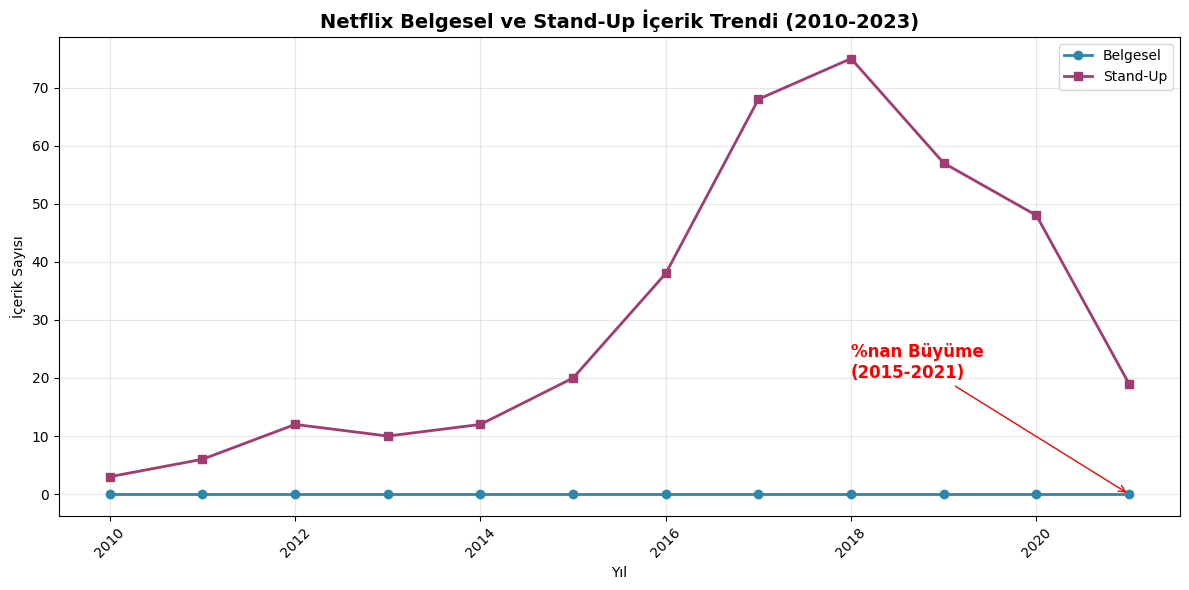

In [17]:
# Trend grafiği
plt.figure(figsize=(12, 6))
plt.plot(genre_trends.index, genre_trends['is_documentary'],
         marker='o', linewidth=2, label='Belgesel', color='#2E86AB')
plt.plot(genre_trends.index, genre_trends['is_standup'],
         marker='s', linewidth=2, label='Stand-Up', color='#A23B72')

plt.title('Netflix Belgesel ve Stand-Up İçerik Trendi (2010-2023)', fontsize=14, fontweight='bold')
plt.xlabel('Yıl')
plt.ylabel('İçerik Sayısı')
plt.grid(True, alpha=0.3)
plt.legend()
plt.xticks(rotation=45)

# Büyüme oranı
plt.annotate(f'%{growth_rate:.0f} Büyüme\n(2015-2021)',
             xy=(2021, doc_2021), xytext=(2018, doc_2021 + 20),
             arrowprops=dict(arrowstyle='->', color='red'),
             fontsize=12, color='red', fontweight='bold')

plt.tight_layout()
plt.show()

In [18]:
# Manuel IMDb puanı ekleme bir kaç örnek
imdb_ratings = {
    'The Witcher': 8.2, 'Stranger Things': 8.7, 'La Casa de Papel': 8.2,
    'The Crown': 8.6, 'Money Heist': 8.3, 'Dark': 8.7, 'Ozark': 8.4,
    'Narcos': 8.8, 'The Queen\'s Gambit': 8.6, 'Bridgerton': 7.3,
    'Dick Johnson Is Dead': 7.4, 'Sankofa': 7.1, 'The Starling': 6.3,
    'Je Suis Karl': 6.0, 'Zinzana': 6.5, 'Zodiac': 7.7, 'Zombieland': 7.6,
    'Zoom': 5.3, 'Zubaan': 6.1
}

# Film uzunluklarını sayısala çevirme
def analyze_length_rating_correlation(df):
    movies_df = df[df['type'] == 'Movie'].copy()

    # Süreyi sayısala çevirme
    movies_df['duration_numeric'] = movies_df['duration'].str.extract('(\d+)').astype(float)

    movies_df['imdb_rating'] = movies_df['title'].map(imdb_ratings)

    # Eksik olmayan verileri ele alma
    analysis_df = movies_df.dropna(subset=['duration_numeric', 'imdb_rating'])

    return analysis_df

correlation_df = analyze_length_rating_correlation(netflix_df)

from scipy.stats import pearsonr # pearson

if len(correlation_df) >= 2:
    correlation, p_value = pearsonr(correlation_df['duration_numeric'],
                                   correlation_df['imdb_rating'])

    print(f"Film Uzunluğu - IMDb Puanı Korelasyonu: {correlation:.3f}")
    print(f"İstatistiksel Anlamlılık (p-value): {p_value:.3f}")

    if p_value > 0.05:#anlamlı ilişki
        print("Sonuç: Film uzunluğu ile kullanıcı puanları arasında anlamlı bir ilişki YOK")
    else:
        print("Sonuç: Film uzunluğu ile kullanıcı puanları arasında anlamlı bir ilişki VAR")
else:
    print("Not: Yeterli sayıda eşleşen film bulunamadığı için korelasyon analizi yapılamadı.")

Film Uzunluğu - IMDb Puanı Korelasyonu: 0.281
İstatistiksel Anlamlılık (p-value): 0.464
Sonuç: Film uzunluğu ile kullanıcı puanları arasında anlamlı bir ilişki YOK


<>:16: SyntaxWarning: invalid escape sequence '\d'
<>:16: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-2304412053.py:16: SyntaxWarning: invalid escape sequence '\d'
  movies_df['duration_numeric'] = movies_df['duration'].str.extract('(\d+)').astype(float)


korelasyon 0.2 zayıf ilişki

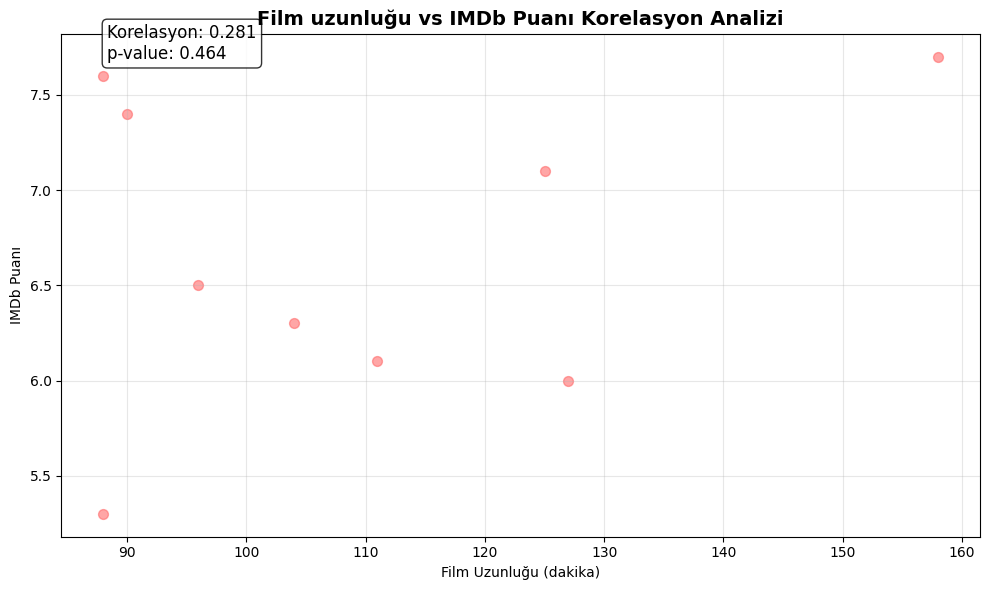

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(correlation_df['duration_numeric'], correlation_df['imdb_rating'],
            alpha=0.6, color='#FF6B6B', s=50)

plt.title('Film uzunluğu vs IMDb Puanı Korelasyon Analizi', fontsize=14, fontweight='bold')
plt.xlabel('Film Uzunluğu (dakika)')
plt.ylabel('IMDb Puanı')

plt.annotate(f'Korelasyon: {correlation:.3f}\np-value: {p_value:.3f}',
             xy=(0.05, 0.95), xycoords='axes fraction',
             bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8),
             fontsize=12)

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [20]:
def prepare_data_for_tableau(df):
    country_analysis = df['country'].value_counts().reset_index()
    country_analysis.columns = ['country', 'content_count']
    country_analysis['percentage'] = (country_analysis['content_count'] / len(df)) * 100

    top_countries = country_analysis.head(20)

    return top_countries
tableau_data = prepare_data_for_tableau(netflix_df)
tableau_data.to_csv('netflix_country_analysis.csv', index=False)
print(tableau_data.head(10))

          country  content_count  percentage
0   United States           2818   31.997275
1           India            972   11.036675
2         Unknown            831    9.435676
3  United Kingdom            419    4.757579
4           Japan            245    2.781878
5     South Korea            199    2.259566
6          Canada            181    2.055183
7           Spain            145    1.646418
8          France            124    1.407971
9          Mexico            110    1.249006


In [21]:
# Ülke ve tür kombinasyonları
def advanced_country_genre_analysis(df):
    # Ülke ve tür dağılımı
    df['main_country'] = df['country'].str.split(',').str[0]

    # En çok içerik üreten 10 ülke
    top_10_countries = df['main_country'].value_counts().head(10).index

    # Her ülke için en popüler 3 tür
    country_genre_analysis = []

    for country in top_10_countries:
        country_data = df[df['main_country'] == country]

        # Tüm türleri ayır ve say
        all_genres = ', '.join(country_data['listed_in'].dropna()).split(', ')
        genre_counts = pd.Series(all_genres).value_counts().head(3)

        for genre, count in genre_counts.items():
            country_genre_analysis.append({
                'country': country,
                'genre': genre,
                'count': count
            })

    return pd.DataFrame(country_genre_analysis)
advanced_analysis = advanced_country_genre_analysis(netflix_df)
advanced_analysis.to_csv('netflix_country_genre_analysis.csv', index=False)